In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/Users/priyakundu/Downloads/dataset.csv')

data

,Unnamed: 0,v,vw,o,c,h,l,n,date,prev_close,daily_return,abs_daily_return,year,day,is_outlier,10-day MA,30-day Volatility,RSI,Price_Up_Down
0,65,69913,1.0329,1.03606,1.02891,1.041960,1.02621,69913,2010-01-04,NaN,NaN,1.02891,2010,Monday,0,1.038591,NaN,45.330339,1
1,66,76822,1.0304,1.02900,1.03341,1.035960,1.02515,76822,2010-01-05,1.02891,0.004374,1.03341,2010,Tuesday,0,1.037668,NaN,51.991311,0
2,67,81057,1.0321,1.03341,1.02746,1.037830,1.02480,81057,2010-01-06,1.03341,-0.005758,1.02746,2010,Wednesday,0,1.035867,NaN,38.022523,1
3,68,72488,1.0321,1.02744,1.03370,1.037050,1.02414,72488,2010-01-07,1.02746,0.006073,1.03370,2010,Thursday,0,1.034403,NaN,45.471928,0
4,69,73991,1.0311,1.03375,1.02325,1.038370,1.02151,73991,2010-01-08,1.03370,-0.010109,1.02325,2010,Friday,0,1.032823,NaN,30.990099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,3633,12916,0.8563,0.85534,0.85581,0.858300,0.85380,12916,2023-12-25,0.85570,0.000129,0.85581,2023,Monday,0,0.863986,0.060472,23.933565,0
3569,3634,112192,0.8555,0.85600,0.85372,0.857960,0.85280,112192,2023-12-26,0.85581,-0.002442,0.85372,2023,Tuesday,0,0.861848,0.048946,22.794404,0
3570,3635,174820,0.8495,0.85359,0.84250,0.854870,0.84060,174820,2023-12-27,0.85372,-0.013142,0.84250,2023,Wednesday,0,0.859001,0.060001,16.314069,1
3571,3636,196178,0.8392,0.84240,0.84337,0.845145,0.83300,196178,2023-12-28,0.84250,0.001033,0.84337,2023,Thursday,0,0.856630,0.059782,10.057586,0


In [2]:
# Check for missing values and fill or drop them
data.fillna(method='ffill', inplace=True)  # forward filling the missing values
data.fillna(method='bfill', inplace=True)  # backward filling the missing values

# Convert day of the week to categorical variables
# data['day'] = data['day'].astype('category').cat.codes
data = data.rename(columns={'day': 'day_of_the_week'})

# drop the unnecesary columns
data.drop(columns=['Unnamed: 0', 'prev_close', 'abs_daily_return', 'year'], inplace=True)

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_39821/3769693644.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # forward filling the missing values
/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_39821/3769693644.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # backward filling the missing values


In [3]:
# data.to_csv('updated_dataset.csv')

In [4]:
# Feature selection
features = ['c', 'daily_return','10-day MA', 'RSI', 'Price_Up_Down']
data = data[features]

# Splitting the dataset into training and test sets
X = data.drop('Price_Up_Down', axis=1)
y = data['Price_Up_Down']

# Time-based splitting
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Model training using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5020979020979021
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       344
           1       0.52      0.56      0.54       371

    accuracy                           0.50       715
   macro avg       0.50      0.50      0.50       715
weighted avg       0.50      0.50      0.50       715



In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.5006993006993007
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.06      0.11       344
           1       0.51      0.91      0.65       371

    accuracy                           0.50       715
   macro avg       0.45      0.48      0.38       715
weighted avg       0.45      0.50      0.39       715



In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape features for LSTM Layer: LSTM expects input shape of [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4995 - loss: 0.6934 - val_accuracy: 0.5007 - val_loss: 0.6937
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5413 - loss: 0.6914 - val_accuracy: 0.5007 - val_loss: 0.6934
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5342 - loss: 0.6923 - val_accuracy: 0.5007 - val_loss: 0.6937
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5099 - loss: 0.6930 - val_accuracy: 0.5007 - val_loss: 0.6944
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5282 - loss: 0.6918 - val_accuracy: 0.5007 - val_loss: 0.6942
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5230 - loss: 0.6920 - val_accuracy: 0.5007 - val_loss: 0.6940
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5192 - loss: 0.6924 - val_accuracy: 0.5007 - val_loss: 0.6945
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5177 - loss: 0.6927 - val_accuracy: 0.5007 - val_loss: 0.6

In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 0.6953  
Accuracy: 50.77


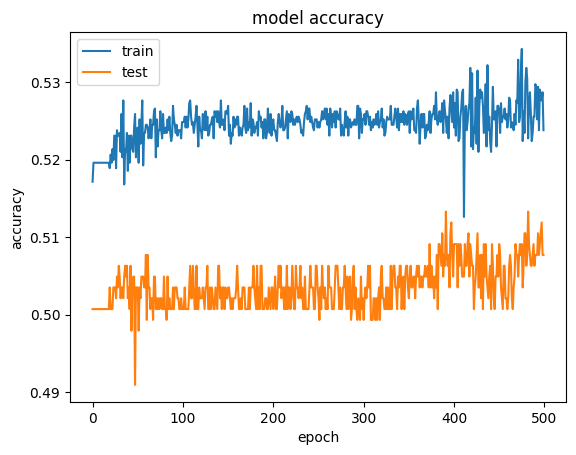

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()